<a href="https://colab.research.google.com/github/Esteban19967769/MIT_Trabajos/blob/main/MIT_Estadistica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contexto**

Forbes es una empresa editorial y de medios con sede en los Estados Unidos controlada por Integrated Whale Media Investments y la familia Forbes. Es bien conocido por su revista y clasificaciones de multimillonarios y equipos deportivos.
Como científico de datos recién contratado de la empresa Forbes, se le ha asignado la tarea de analizar el patrimonio neto de Forbes Top Billionaires 2020. Su objetivo es analizar los datos y obtener información.




## **Enunciado del problema**


Analiza el valor neto de los multimillonarios de Forbes 2020.



**Diccionario de datos**


Name - Nombre de la persona
<br>
Net worth in billions - Valor neto de la persona en miles de millones <br>
Country - País de donde es la persona <br>
Source - Fuente de los ingresos <br>
Rank - Rango de la persona en la lista de multimillonarios <br>
Age - Edad de la persona <br>
Industry - Industria con la que está relacionada la persona <br>


## Importación de bibliotecas


In [ ]:
import numpy as np  ##creacion de matrices, operaciones bascias,funciones matematicas(log,sen,cos)
import pandas as pd ##creacion dataframe, series, consulta de columnas y filas, agregar quitar columnas, importar y exportar csv, agrupa datos, merge
import matplotlib.pyplot as plt ##graficos
%matplotlib inline
import seaborn as sns ##estadistica descriptiva, diagramas dispersion, grafico densidad, heatmap

## Cargando conjunto de datos y entendiéndolo


In [ ]:
df = pd.read_csv('CLASE_1Forbes+Billionaire+2020.csv')

### Desglosando las 5 primeras filas


In [ ]:
df.head()

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36,Technology


### Dimensión de datos


In [ ]:
df.shape #(filas,columnas)

(2755, 7)

### Los tipos de datos de las columnas en el dataframe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  2755 non-null   object 
 1   NetWorth in billions  2755 non-null   float64
 2   Country               2755 non-null   object 
 3   Source                2755 non-null   object 
 4   Rank                  2755 non-null   int64  
 5   Age                   2755 non-null   int64  
 6   Industry              2755 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 150.8+ KB


### Comprobación de valores faltantes


In [ ]:
#df.isnull() #se muestra la tabla con falso no nulo y true nulo
df.isnull().sum()  #la cantidad de nulos por columnas
df.isnull().sum().sum()  #la cantidad de nulos en el csv


0

### Gráficas y su uso


#### Diagrama de caja: ayuda a verificar valores atípicos


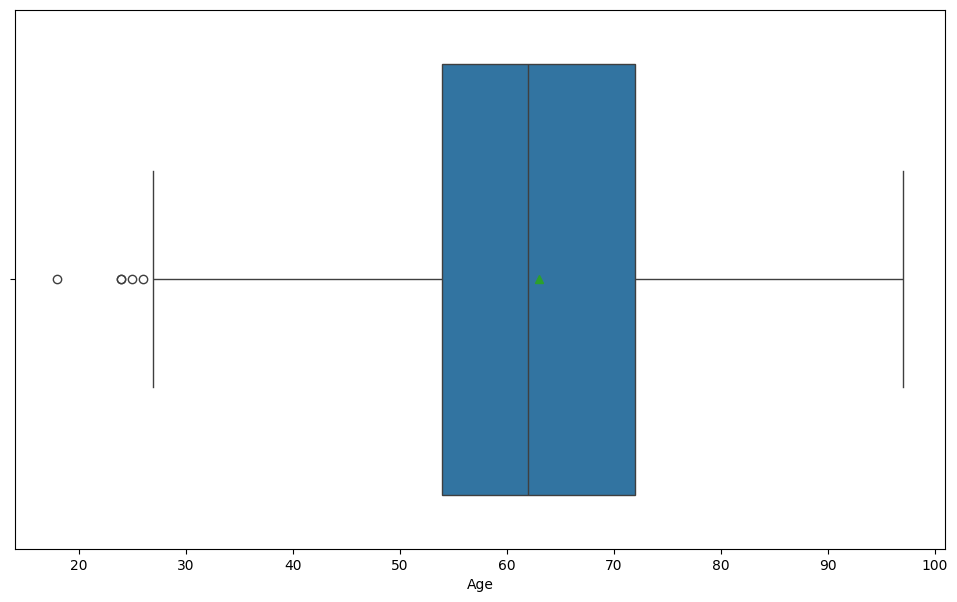

In [ ]:
plt.figure(figsize=(12,7)) #2 anchura, #7altura
sns.boxplot(x = "Age", data = df, showmeans=True)
plt.show()

## Análisis de los datos


### Resumen de datos


In [ ]:
df[["NetWorth in billions","Age"]].describe()  #resumen estadistico de dos variables

,NetWorth in billions,Age
count,2755.000000,2755.000000
mean,4.749220,63.014519
std,9.615358,13.259017
min,1.000000,18.000000
25%,1.500000,54.000000
50%,2.300000,62.000000
75%,4.200000,72.000000
max,177.000000,97.000000


#### Distribución de la variable *Age*


#### Diagrama de distribución


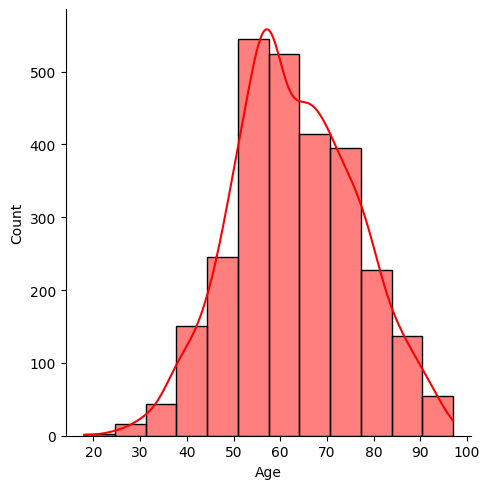

In [ ]:
sns.displot(df["Age"],kde = True, color = "red", bins=12) #Histograma de la edad, kde te muestra la linea que une los puntos de cada intervalo, bins es la cantidad de intervalos
plt.show()

#### ¿Cuáles son los 5 países que tienen el mayor número de billonarios?


In [ ]:
df.Country.value_counts().head()

Country
United States    724
China            626
India            140
Germany          136
Russia           118
Name: count, dtype: int64

#### ¿A qué países pertenecen los 5 multimillonarios más jóvenes?


In [ ]:
df.sort_values(by = "Age").head(10)

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
940,Kevin David Lehmann,3.3,Germany,drugstores,925,18,Fashion & Retail
2143,Alexandra Andresen,1.4,Norway,investments,2141,24,Diversified
2122,Wang Zelong,1.5,China,chemicals,2035,24,Metals & Mining
2144,Katharina Andresen,1.4,Norway,investments,2141,25,Diversified
1338,Austin Russell,2.4,United States,Unknown,1299,26,Automotive
661,Gustav Magnar Witzoe,4.4,Norway,fish farming,655,27,Food & Beverage
1596,Andy Fang,2.0,United States,food delivery app,1580,28,Technology
1645,Stanley Tang,2.0,United States,food delivery app,1580,28,Technology
274,Sam Bankman-Fried,8.7,United States,cryptocurrency,274,29,Finance & Investments
1328,Jonathan Kwok,2.4,Hong Kong,Real Estate,1299,29,Real Estate


In [ ]:
df.sort_values(by = 'NetWorth in billions').head(5)['Country'].unique()  #Unique devuleve los valores unicos no duplicados


array(['China', 'South Korea', 'Israel'], dtype=object)

Countplot para la industria

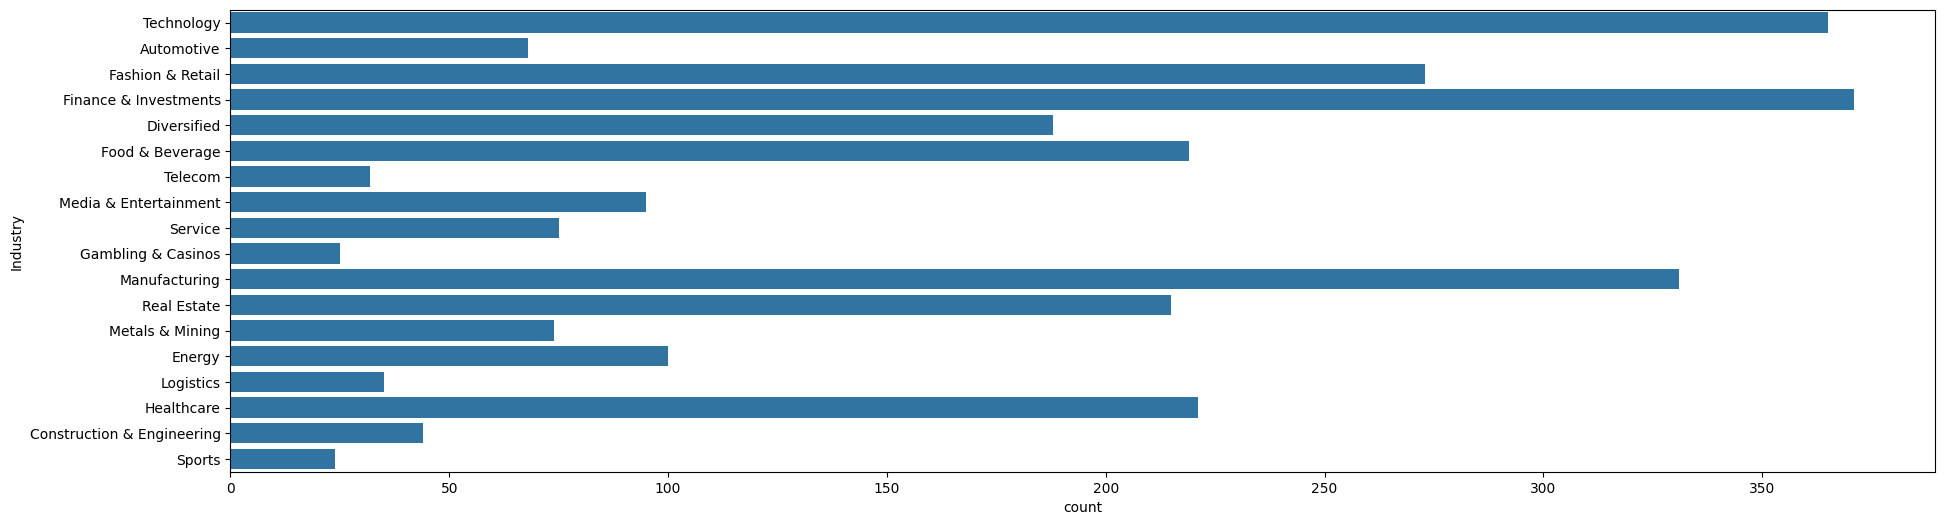

In [ ]:
#Grafico de barras
plt.figure(figsize=(22,6))
sns.countplot(df['Industry'])
plt.show()

In [ ]:
df['Industry'].value_counts()


Industry
Finance & Investments         371
Technology                    365
Manufacturing                 331
Fashion & Retail              273
Healthcare                    221
Food & Beverage               219
Real Estate                   215
Diversified                   188
Energy                        100
Media & Entertainment          95
Service                        75
Metals & Mining                74
Automotive                     68
Construction & Engineering     44
Logistics                      35
Telecom                        32
Gambling & Casinos             25
Sports                         24
Name: count, dtype: int64

Nombra a todos los multimillonarios de la India menores de 50 años.

In [ ]:
Indian_billionaires = df[df['Country']=='India']
Indian_billionaires

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
9,Mukesh Ambani,84.5,India,diversified,10,63,Diversified
23,Gautam Adani & family,50.5,India,"infrastructure, commodities",24,58,Diversified
71,Shiv Nadar,23.5,India,software services,71,75,Technology
116,Radhakishan Damani,16.5,India,"retail, investments",117,66,Fashion & Retail
122,Uday Kotak,15.9,India,banking,121,62,Finance & Investments
...,...,...,...,...,...,...,...
2683,Ramesh Kumar Dua,1.0,India,footwear,2674,67,Fashion & Retail
2698,Ashok Kajaria,1.0,India,tiles,2674,73,Manufacturing
2699,T.S. Kalyanaraman,1.0,India,jewelry,2674,73,Fashion & Retail
2712,Rafique Malik,1.0,India,footwear,2674,70,Fashion & Retail


In [ ]:
print('The names of the Indian Billionaires under the age of 50 are:')
Indian_billionaires[Indian_billionaires['Age']<50]['Name'].values   #valores de los nombres de aquellos que poseen menos de 50 años

The names of the Indian Billionaires under the age of 50 are:


array(['Byju Raveendran and Divya Gokulnath', 'Vijay Shekhar Sharma',
       'Acharya Balkrishna', 'Radha Vembu', 'Ranjan Pai', 'Sachin Bansal',
       'Binny Bansal', 'Sekar Vembu'], dtype=object)

Pieplot

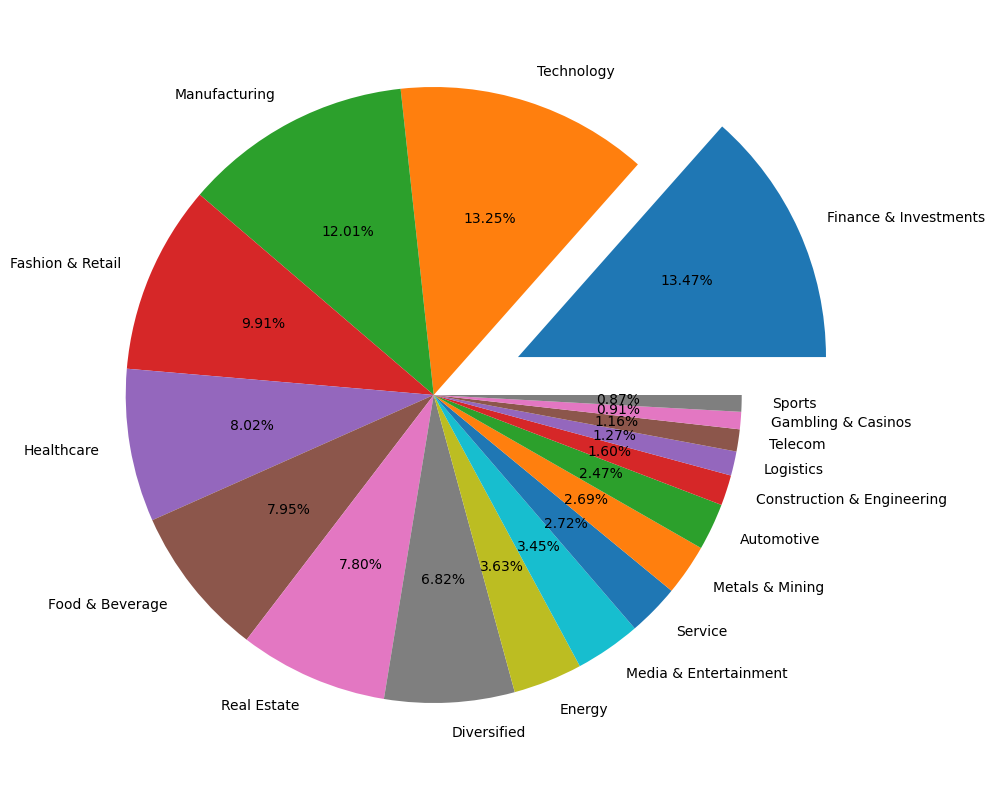

In [ ]:
plt.figure(figsize=(11,10))
plt.pie(df["Industry"].value_counts(), labels=df["Industry"].value_counts().index, autopct='%.2f%%',
        explode = (0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))  #esto sirve para quitar pedazos de la torta
# autopct="%.2f%%" is used here display the percentage in the pie-chart upto 1 deciaml place
# explode is used here to take the 'Finance & Investment'(30%) of the pie-chart
plt.show()

Para comprobar la distribución de edad por industria

Usar diagrama de caja

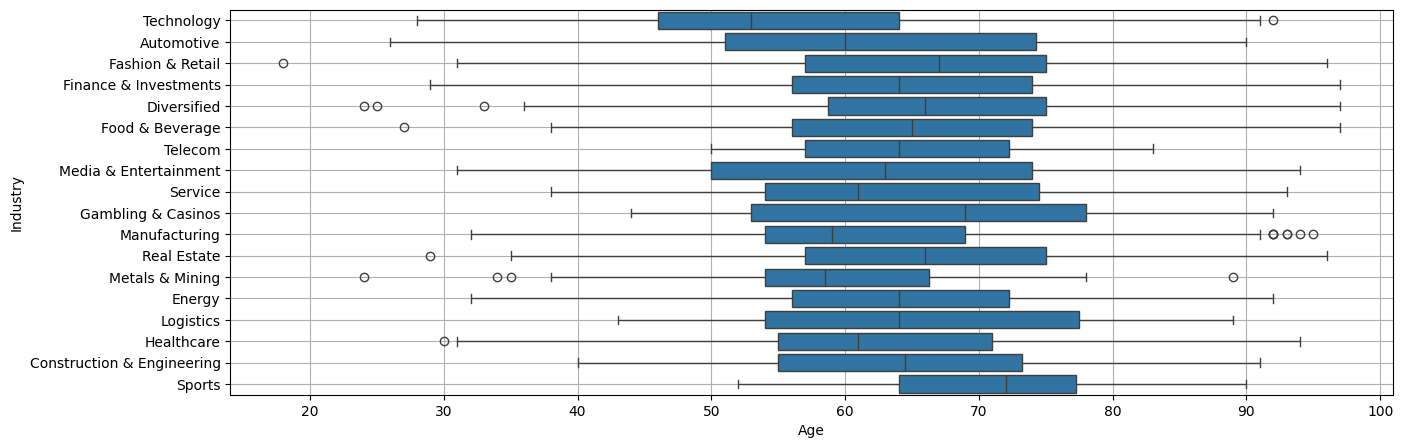

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x= 'Age', y='Industry', data=df)
plt.grid()
plt.show()

Usar gráfico de franjas

Trace un diagrama de franjas para verificar la relación entre las variables 'Industria' y 'Edad'.



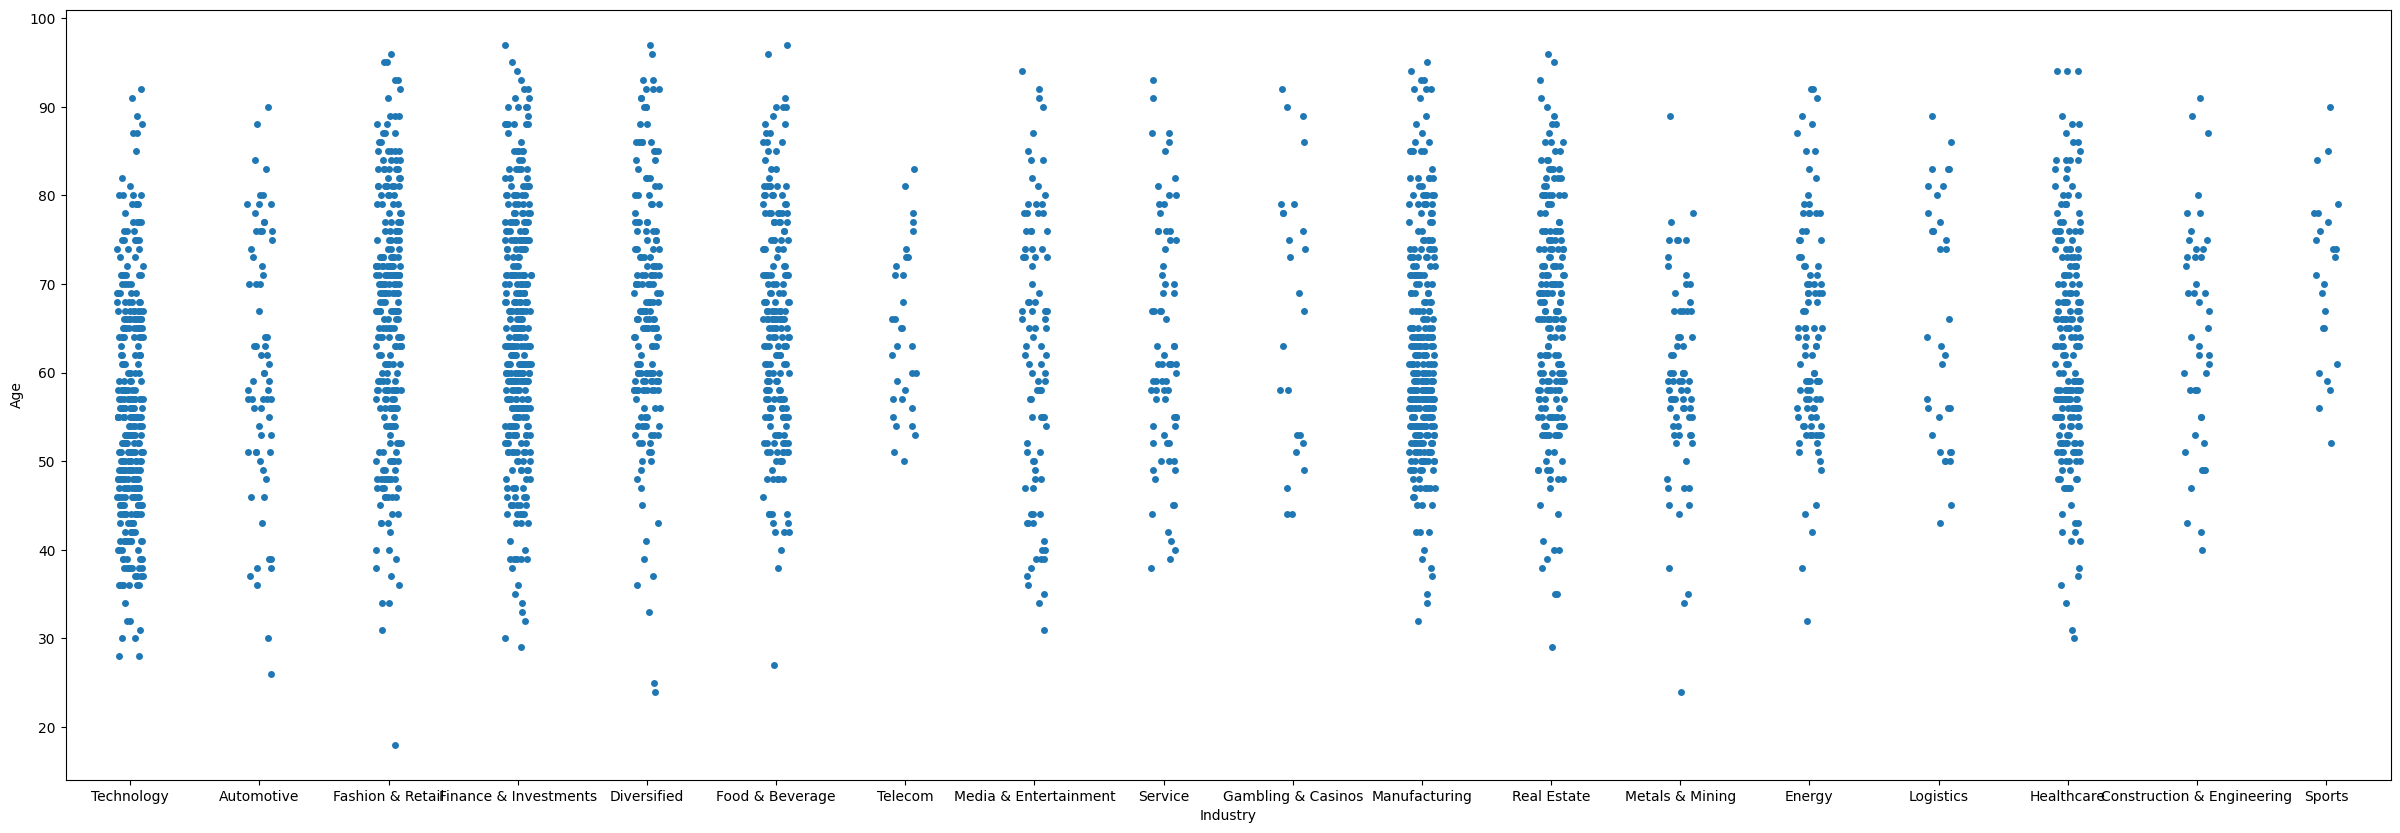

In [ ]:
# strip plot
plt.figure(figsize=(30,10))
sns.stripplot(x = 'Industry', y = 'Age', data = df)

# display the plot
plt.show()

Scatterplot
Solo funciona con los float e int64

<Figure size 800x800 with 0 Axes>

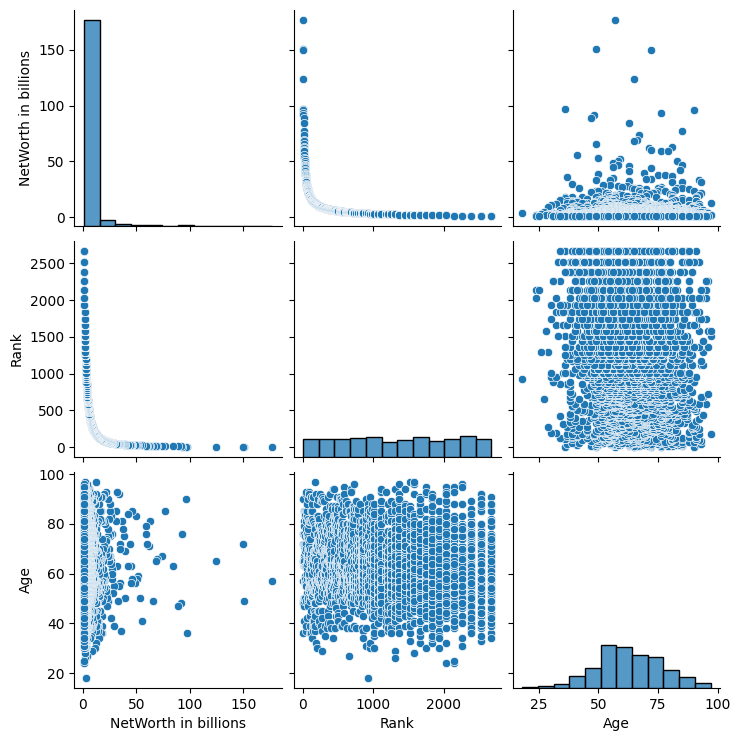

In [ ]:
plt.figure(figsize = (8,8))

# plot a pair plot
sns.pairplot(data=df,diag_kws={'bins':12})  #asegura que cada histograma en la diagonal tenga 6 contenedores (bins) para la distribución de los datos
# display the plot
plt.show()

In [ ]:
df.columns
##ME QUEDO CON LAS VARIABLES FLOAT A TRABAJAR
df2 = df[['NetWorth in billions', 'Rank', 'Age']]

Heatmap

In [ ]:
# compute correlation
corr_matrix = df2.corr()
corr_matrix

,NetWorth in billions,Rank,Age
NetWorth in billions,1.000000,-0.475346,0.035225
Rank,-0.475346,1.000000,-0.104220
Age,0.035225,-0.104220,1.000000


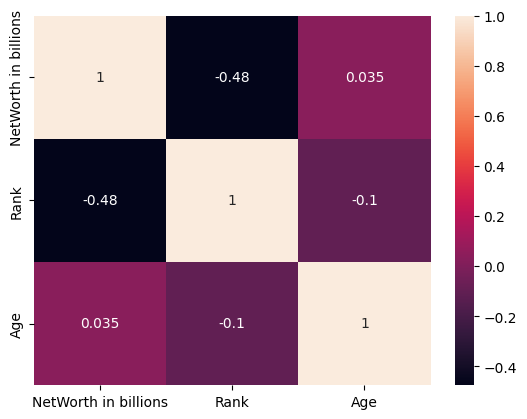

In [ ]:
# plot heatmap
# 'annot=True' returns the correlation values
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

In [ ]:
score = [10, 15, 20, 25]
pd.Series(data=score, index = ['a','b','c','d'])

a    10
b    15
c    20
d    25
dtype: int64